# Part 1/4 to generate Aachen dataset:
## (Binary images with LiDAR footprints and tilt distribution)
## Pickle generation

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### We load the CSV file from the processed rooftops:

In [2]:
# change path to file location

dataset = pd.read_csv('data/aachen_model.csv')

c:\users\rodri\envs\rooftop-segmentation\lib\site-packages\IPython\core\interactiveshell.py:3155: DtypeWarning: Columns (1,4,5,9,13,15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
dataset.head()

,Unnamed: 0,ST_AsText_1,ST_AsText_2,ST_SRID_1,Within,normal,area,tilt,azimuth,center,lon,lat,capacity,flat,elev,group,ID,poa,generation,gen
0,217008,"POLYGON Z ((293727.27 5628870.318 193.661,2937...",NaN,25832.0,True,[ 0. -0. 1.],45.969333,32.0,180.0,"[(293728.858683662, 5628871.637373464)]",6.074272,50.774872,2.442626,True,300.0,S2,217008.0,1.293567e+06,2426.687024,NaN
1,217013,"POLYGON Z ((293152.73 5628244.806 200.56,29315...",NaN,25832.0,True,[0. 0. 1.],36.064949,32.0,180.0,"[(293157.8567467185, 5628243.828399268)]",6.066537,50.769030,1.916347,True,300.0,S2,217013.0,1.291059e+06,1900.208815,NaN
2,217014,"POLYGON Z ((293338.797 5628376.212 209.549,293...",NaN,25832.0,True,[ 0. -0. 1.],84.837309,32.0,180.0,"[(293333.1229463291, 5628372.518758716)]",6.068947,50.770248,4.507915,True,300.0,S2,217014.0,1.291719e+06,4472.235407,NaN
3,217015,"POLYGON Z ((293953.597 5628904.371 175.672,293...",NaN,25832.0,True,[0. 0. 1.],15.082291,32.0,180.0,"[(293956.34312867903, 5628904.182674101)]",6.077476,50.775245,0.801413,True,300.0,S2,217015.0,1.293886e+06,796.370705,NaN
4,217016,"POLYGON Z ((293033.69 5628972.298 224.45,29303...",NaN,25832.0,True,[ 0. -0. 1.],20.620000,32.0,180.0,"[(293035.99658036133, 5628969.486089646)]",6.064403,50.775504,1.095664,True,300.0,S2,217016.0,1.293108e+06,1088.118841,NaN


#### Remove NULL instances:

In [25]:
dataset = dataset[dataset.ST_AsText_1.notnull()]

In [6]:
poly_str = dataset.iloc[0]['ST_AsText_1']

In [7]:
# seems to be in UTM
poly_str

'POLYGON Z ((293727.27 5628870.318 193.661,293732.004 5628867.574 193.661,293732.67 5628868.708 193.661,293734.321 5628871.519 193.661,293726.553 5628875.993 193.661,293723.552 5628870.71 193.661,293726.496 5628868.998 193.661,293727.27 5628870.318 193.661))'

In [8]:
lat_center = dataset.iloc[0]['lat']
lon_center = dataset.iloc[0]['lon']

#### Convert UTM to LATLON:

In [9]:
import utm
u = utm.from_latlon(lat_center, lon_center)

In [10]:
u

(293728.85866784235, 5628871.637790619, 32, 'U')

In [11]:
latlon = utm.to_latlon(291390.522, 5627933.578, u[2], u[3])

print(latlon)

(50.76561116416389, 6.0416842841857905)


In [12]:
poly_str = poly_str.replace('POLYGON Z ((', '').replace('))', '')
print(poly_str)

293727.27 5628870.318 193.661,293732.004 5628867.574 193.661,293732.67 5628868.708 193.661,293734.321 5628871.519 193.661,293726.553 5628875.993 193.661,293723.552 5628870.71 193.661,293726.496 5628868.998 193.661,293727.27 5628870.318 193.661


In [13]:
ZONE_NUMBER = 32
ZONE_LETTER = 'U'

coords = []

for coord in poly_str.split(','):
    x_utm, y_utm, _ = coord.split(' ')
    latlon = utm.to_latlon(float(x_utm), float(y_utm), ZONE_NUMBER, ZONE_LETTER)
    coords.append(latlon)

In [14]:
coords

[(50.774859482832824, 6.074250446530072),
 (50.774836521947094, 6.074319038398946),
 (50.774846943341544, 6.074327835803578),
 (50.77487277630027, 6.074349644492308),
 (50.774910195705736, 6.074237108342073),
 (50.77486168137324, 6.074197564379871),
 (50.77484735254282, 6.074240223719505),
 (50.774859482832824, 6.074250446530072)]

In [27]:
# as we can see, there are rows with more than one geometry

ZONE_NUMBER = 32
ZONE_LETTER = 'U'

geom = []
for index, row in dataset.iterrows():
    poly_str = row['ST_AsText_1']
    poly_str = poly_str.replace('POLYGON Z ((', '').replace('))', '')
    
    try:
        coords = []
        for coord in poly_str.split(','):
            x_utm, y_utm, _ = coord.split(' ')
            latlon = utm.to_latlon(float(x_utm), float(y_utm), ZONE_NUMBER, ZONE_LETTER)
            coords.append(latlon)
    except Exception:
        print(index)
        print(row['ST_AsText_1'])
        break
    
    geom.append(coords)

57900
POLYGON Z ((297996.47 5621955.874 290.457,298016.766 5621971.351 290.457,298007.846 5621983.052 290.457,297987.55 5621967.585 290.457,297996.47 5621955.874 290.457),(297997.126 5621959.007 290.457,297990.734 5621967.382 290.457,298006.248 5621979.193 290.457,298012.622 5621970.836 290.457,297997.126 5621959.007 290.457))


In [29]:
row['ST_AsText_1']

'POLYGON Z ((297996.47 5621955.874 290.457,298016.766 5621971.351 290.457,298007.846 5621983.052 290.457,297987.55 5621967.585 290.457,297996.47 5621955.874 290.457),(297997.126 5621959.007 290.457,297990.734 5621967.382 290.457,298006.248 5621979.193 290.457,298012.622 5621970.836 290.457,297997.126 5621959.007 290.457))'

In [30]:
poly = dataset.iloc[11529]['ST_AsText_1']

# first parenthesis contents
c = poly[poly.find('(')+1:poly.rfind(')')]

building_geoms = []
while '(' in c:
    occurrence = c[c.find('(')+1:c.find(')')]
    c = c.replace('(','',1).replace(')','',1)
    
    building_geoms.append(occurrence)

print(building_geoms)

['293335.131 5630002.3 192.3,293336.408 5630000.716 192.3,293337.556 5630001.641 192.3,293336.29 5630003.234 192.3,293335.131 5630002.3 192.3']


In [31]:
# NOW, geoms WILL CONTAIN ONE DIMENSION PER:
# - BUILDING
# - BUILDING GEOMETRY
# - BUILDING GEOMETRY COORDINATES

ZONE_NUMBER = 32
ZONE_LETTER = 'U'

geom = []
for index, row in dataset.iterrows():
    poly_str = row['ST_AsText_1']
    poly_str = poly_str[poly_str.find('(')+1:poly_str.rfind(')')]
    
    building_geoms_str = []
    
    while '(' in poly_str:
        # each of the geoms of the building
        occurrence = poly_str[poly_str.find('(')+1:poly_str.find(')')]
        poly_str = poly_str.replace('(','',1).replace(')','',1)
        
        building_geoms_str.append(occurrence)
    
    building_geoms = []
    
    for occurrence in building_geoms_str:
        coords = []
        for coord in occurrence.split(','):
            x_utm, y_utm, _ = coord.split(' ')
            latlon = utm.to_latlon(float(x_utm), float(y_utm), ZONE_NUMBER, ZONE_LETTER)
            coords.append(latlon)
        building_geoms.append(coords)
    
    geom.append(building_geoms)

In [32]:
len(geom)

190130

In [33]:
geom[0][0]

[(50.774859482832824, 6.074250446530072),
 (50.774836521947094, 6.074319038398946),
 (50.774846943341544, 6.074327835803578),
 (50.77487277630027, 6.074349644492308),
 (50.774910195705736, 6.074237108342073),
 (50.77486168137324, 6.074197564379871),
 (50.77484735254282, 6.074240223719505),
 (50.774859482832824, 6.074250446530072)]

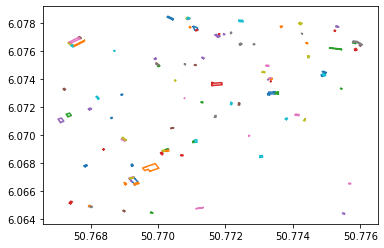

In [36]:
plt.figure()
for geo in geom[:100]:
    for g in geo:
        xs, ys = list(map(list, zip(*g)))
        plt.plot(xs,ys)

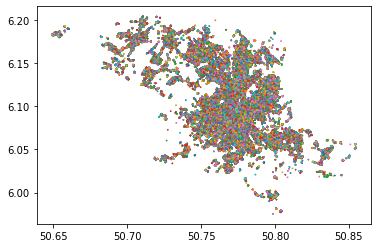

In [37]:
plt.figure()
for geo in geom:
    for g in geo:
        xs, ys = list(map(list, zip(*g)))
        plt.plot(xs,ys)

#### Dump final coordinates to a pickle file:

In [38]:
import pickle

with open('output/aachen_rooftops.pkl', 'wb') as f:
    pickle.dump(geom, f)